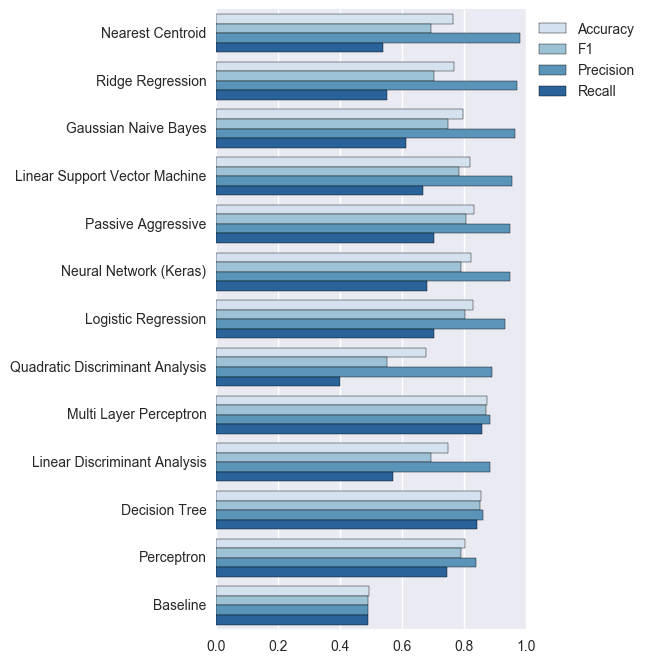

In [28]:
import pickle
import pprint
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
%matplotlib inline

# Method must be available to unpickle KerasClassifier
def keras_baseline_model():
    pass

results = []
with open("results.p", "rb") as results_file:
    results = pickle.load(results_file)

pp = pprint.PrettyPrinter()
#pp.pprint(results)
#print(len(results))

names = list(map(lambda x: x["name"], results))
accuracy = list(map(lambda x: x["scores"]["accuracy"], results))
precision = list(map(lambda x: x["scores"]["precision"], results))
recall = list(map(lambda x: x["scores"]["recall"], results))
f1_score = list(map(lambda x: x["scores"]["f1_score"], results))
f05_score = list(map(lambda x: x["scores"]["f0.5_score"], results))
f025_score = list(map(lambda x: x["scores"]["f0.25_score"], results))
f01_score = list(map(lambda x: x["scores"]["f0.1_score"], results))

# hack names
names = [
    'Baseline',
    'Logistic Regression',
    'Ridge Regression',
    'Perceptron',
    'Passive Aggressive',
    'Linear Discriminant Analysis',
    'Quadratic Discriminant Analysis',
    'Gaussian Naive Bayes',
    'Linear Support Vector Machine',
    'Decision Tree',
    'Nearest Centroid',
    'Multi Layer Perceptron',
    'Neural Network (Keras)'
]


df = pd.DataFrame({
 'Name': names,
#  'Accuracy': accuracy,
 'Precision': precision,
 'Recall': recall,
 'F1': f1_score,
#  'F0.5': f05_score,
#  'F0.25': f025_score,
#  'F0.1': f01_score
}, index=names)
                                          
df = df.sort_values(by=["Precision"], ascending=False)
df = pd.melt(df, id_vars="Name", var_name='score')
plt.figure(figsize=(4,8))
g = sns.barplot(y="Name", x="value", hue="score",data=df, orient="h", palette="Blues")
g.set_ylabel('')
g.set_xlabel('')
lgd = plt.legend(loc='upper left', bbox_to_anchor=(1.0, 1.0))
#plt.tight_layout()
plt.savefig('classifier-comparison.pdf', format='pdf', dpi=1000, bbox_extra_artists=(lgd,), bbox_inches='tight')
